In [3]:
import pandas as pd
import json
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [4]:
training_data = pd.read_csv('../datasets/nrel_training_data.csv')
X = training_data[[
    "fraction_of_usable_area",
    "capacity",
    "wind_speed",
    "capacity_factor"
]]
y = training_data['isTurbine']

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train Random Forest classifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rnd_clf.predict(X_test)
y_prob = rnd_clf.predict_proba(X_test)[:, 1]

In [7]:
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


ROC-AUC: 0.770055408408275


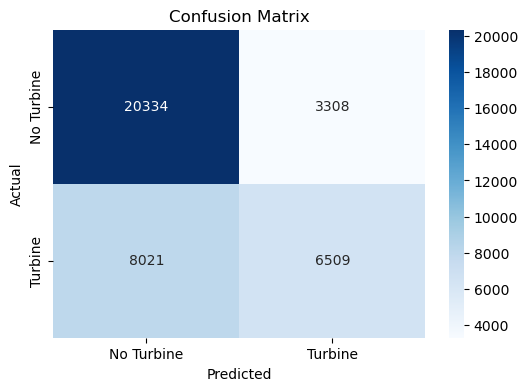

              precision    recall  f1-score   support

       False      0.717     0.860     0.782     23642
        True      0.663     0.448     0.535     14530

    accuracy                          0.703     38172
   macro avg      0.690     0.654     0.658     38172
weighted avg      0.697     0.703     0.688     38172



In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Turbine", "Turbine"], yticklabels=["No Turbine", "Turbine"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_rf, digits=3))

In [9]:
# Save the Random Forest model
joblib.dump(rnd_clf, "random_forest_wind_model.pkl")
print("Random Forest model saved successfully.")


Random Forest model saved successfully.


In [10]:
metrics = {
    "model": "random_forest",
    "roc_auc": roc_auc_score(y_test, y_prob),
    "classification_report": classification_report(y_test, y_pred_rf, digits=3, output_dict=True)
}

with open("random_forest_model_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("AUC saved to random_forest_model_metrics.json")


AUC saved to random_forest_model_metrics.json
